In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

import noise
import model_opt
import algo_GD
import helper

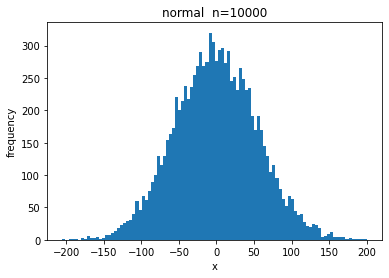

In [42]:
#正規分布
var = np.random.randint(100,200,1)[0]
noise_data = noise.Gauss(mean=0,sigma=55,dim=2,n=10000)
noise_value_gauss = noise_data.generate()

plt.hist(noise_value_gauss.T[0],bins=100)
plt.title("normal  n=10000")
plt.xlabel("x")
plt.ylabel("frequency")
plt.show()

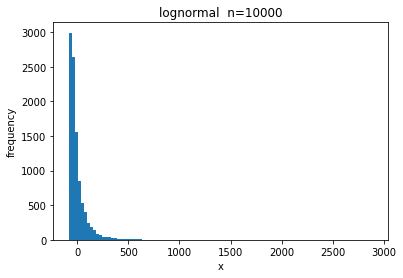

-1.268745108973235e-13


In [43]:
#対数分布
var = np.random.randint(100,200,1)[0]
noise_data = noise.LogNormal(mean=0,sigma=1,dim=2,n=10000)
noise_value_lognormal = noise_data.generate() * 50

plt.hist(noise_value_lognormal.T[0],bins=100)
plt.title("lognormal  n=10000")
plt.xlabel("x")
plt.ylabel("frequency")
plt.show()
print(noise_value_lognormal.T[1].mean(axis=0))

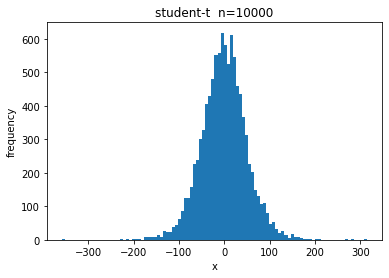

In [44]:
#student-t分布
df = 10
noise_data = noise.StudentT(dim=2,n=10000,df=df)
noise_value_student_t = noise_data.generate() * 45

plt.hist(noise_value_student_t.T[0],bins=100)
plt.title("student-t  n=10000")
plt.xlabel("x")
plt.ylabel("frequency")
plt.show()



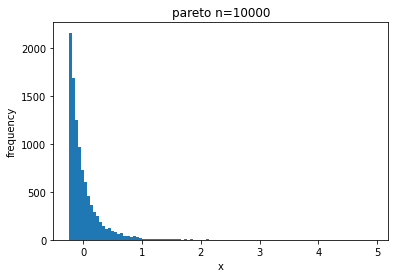

In [45]:
#パレート分布
noise_data = noise.Pareto(dim=2,n=10000,a=5)
noise_value_pareto = noise_data.generate()

plt.hist(noise_value_pareto.T[0],bins=100)
plt.title("pareto n=10000")
plt.xlabel("x")
plt.ylabel("frequency")
plt.show()

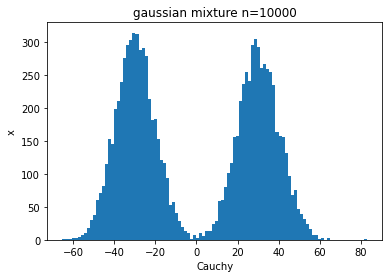

In [42]:
# 混合正規分布
noise_value_gaussian_mixture = noise.GaussianMixture(dim=2,n=10000,sigma=10,mean=30).generate()
plt.hist(noise_value_gaussian_mixture.T[0],bins=100)
plt.title("gaussian mixture n=10000")
plt.xlabel("x")
plt.ylabel("frequency")
plt.show()

Text(0, 0.5, 'frequency')

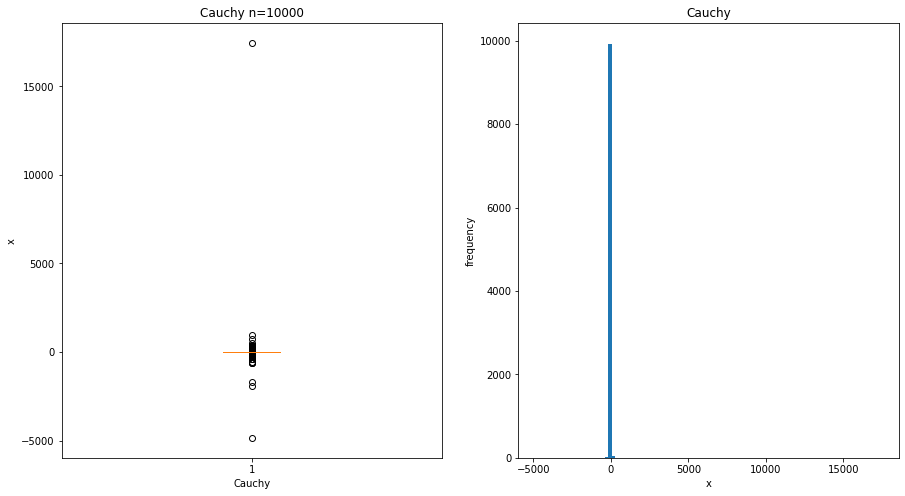

In [51]:
# コーシー分布
noise_value_cauchy = noise.StudentT(dim=2,n=10000,df=1).generate()
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.boxplot(noise_value_cauchy.T[0])
ax1.set_title("Cauchy n=10000")
ax1.set_xlabel("Cauchy")
ax1.set_ylabel("x")

ax2.hist(noise_value_cauchy.T[0],bins=100)
ax2.set_title("Cauchy")
ax2.set_xlabel("x")
ax2.set_ylabel("frequency")

NameError: name 'noise_value_gauss' is not defined

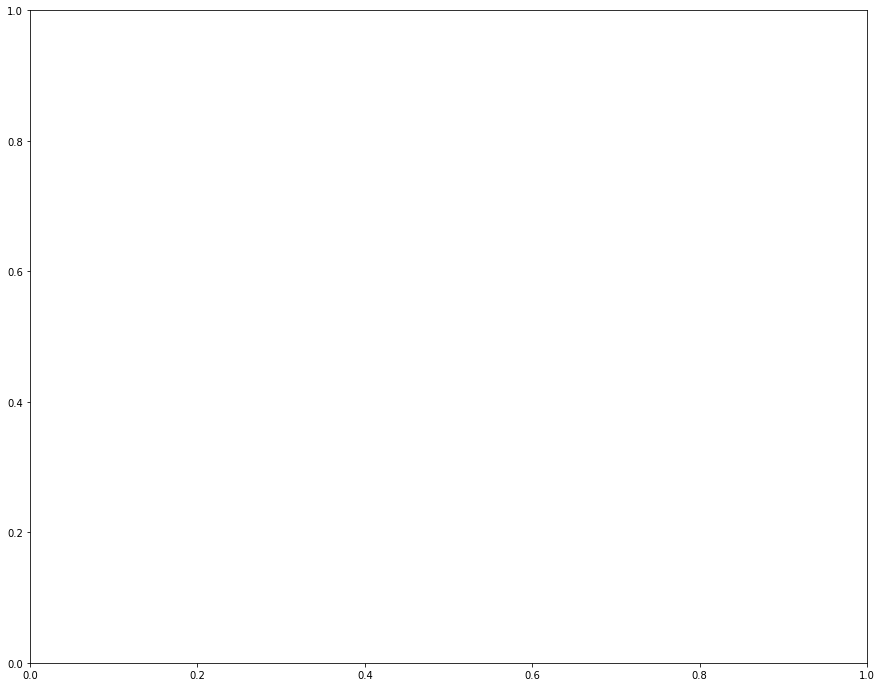

In [29]:
# 箱ひげ図
fig = plt.figure(figsize=(15.0, 12.0))
ax1 = fig.add_subplot(111)
noise_box = noise_value_gauss.T[1], noise_value_lognormal.T[1], noise_value_student_t.T[1], noise_value_gaussian_mixture.T[1]
bp1 = ax1.boxplot(noise_box)
ax1.set_xticklabels(['gauss',"log normal","student_t","gaussian mixture"],fontsize=20)
ax1.set_title('noise',fontsize=20)
ax1.grid()

plt.show()

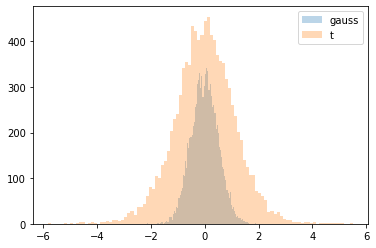

In [48]:
#正規分布+t分布

#正規分布
noise_data = noise.Gauss(mean=0,sigma=0.5,dim=2,n=10000)
noise_value_gauss = noise_data.generate()

#student-t分布
df = 10
noise_data = noise.StudentT(dim=2,n=10000,df=df)
noise_value_t = noise_data.generate()

plt.figure()
plt.hist(noise_value_gauss.T[0],bins=100, alpha=0.3,label="gauss")
plt.hist(noise_value_t.T[0],bins=100,alpha=0.3,label="t")
plt.legend()
plt.show()

In [80]:
#正規分布
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []

for i in range(10):
    var = 55
    noise_data = noise.Gauss(mean=0,sigma=var,dim=2,n=_t_max).generate()
    iqr = helper.iqr(noise_data)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        noise_value = noise_data[algo.t-1]
        f = model_opt.RosenBrock(noise_value=noise_value)
        algo.update(model=f)
    last_w_store.append(algo.w)
    iqr_store.append(iqr)

print(iqr_store)
print(last_w_store)

[76.00968385771611, 74.46763084602719, 70.07341355281838, 70.79588810227978, 73.8967001276348, 72.23086318748251, 78.2495580695062, 77.53954222380933, 71.6258119204179, 76.98216670423072]
[array([0.69322707, 0.42815078]), array([-0.8968742 ,  0.86399167]), array([-1.25203721,  1.65355683]), array([-1.24417924,  1.60634267]), array([-1.06381093,  1.10685319]), array([-0.28216745,  0.09405194]), array([-1.39307714,  1.93066539]), array([-0.74000354,  0.44375685]), array([-0.79844742,  0.75754473]), array([0.31281012, 0.11868992])]


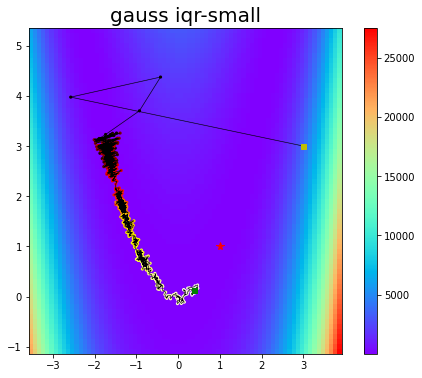

In [81]:
# 正規分布　小
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("gauss iqr-small",fontsize=20)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

231.1433613626574
10.63641625307333


Text(0.5, 0, 'step')

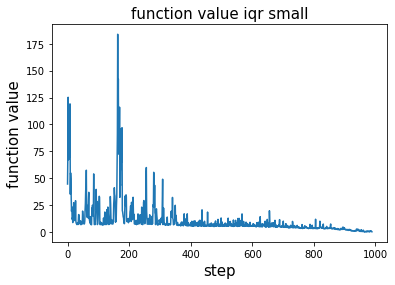

In [82]:
f_noise_small = f.f_opt(w_store.T)[10:]
print(f_noise_small.var())
print(f_noise_small.mean())
plt.plot(f_noise_small)
plt.title("function value iqr small",fontsize=15)
plt.ylabel("function value",fontsize=15)
plt.xlabel("step",fontsize=15)

In [83]:
#正規分布
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []


var = 120
noise_data = noise.Gauss(mean=0,sigma=var,dim=2,n=_t_max).generate()
iqr = helper.iqr(noise_data)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
for i in algo:
    noise_value = noise_data[algo.t-1]
    f = model_opt.RosenBrock(noise_value=noise_value)
    algo.update(model=f)
last_w_store.append(algo.w)
iqr_store.append(iqr)

print(iqr_store)
print(last_w_store)

[163.00574842767287]
[array([0.66045798, 0.55752392])]


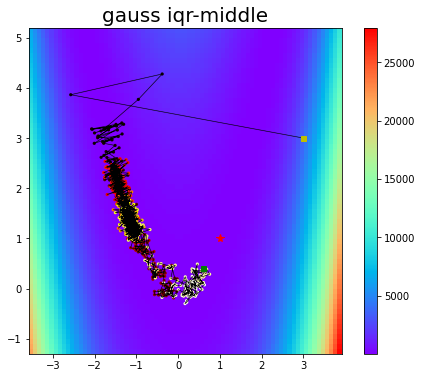

In [84]:
# 正規分布　中
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("gauss iqr-middle",fontsize=20)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

280.79207977639993
12.434743012433815


Text(0.5, 0, 'step')

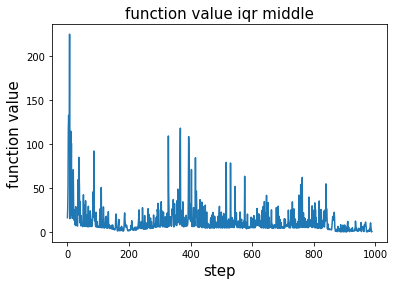

In [85]:
f_noise_middle = f.f_opt(w_store.T)[10:]
f_noise_middle.shape
print(f_noise_middle.var())
print(f_noise_middle.mean())
plt.plot(f_noise_middle)
plt.title("function value iqr middle",fontsize=15)
plt.ylabel("function value",fontsize=15)
plt.xlabel("step",fontsize=15)

In [86]:
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []


var = 210
noise_data = noise.Gauss(mean=0,sigma=var,dim=2,n=_t_max).generate()
iqr = helper.iqr(noise_data)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
for i in algo:
    noise_value = noise_data[algo.t-1]
    f = model_opt.RosenBrock(noise_value=noise_value)
    algo.update(model=f)
last_w_store.append(algo.w)
iqr_store.append(iqr)

print(iqr_store)
print(last_w_store)

[290.7297169177866]
[array([-1.19770501,  1.99215705])]


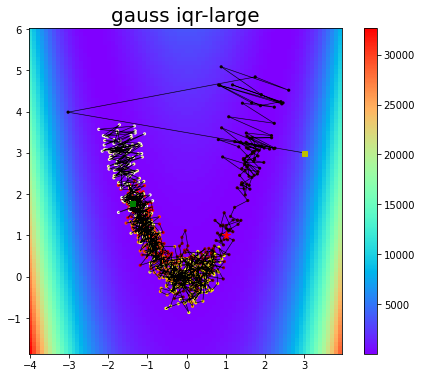

In [87]:
# 正規分布
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("gauss iqr-large",fontsize=20)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

1469.7361273916927
20.555750491544092


Text(0.5, 0, 'step')

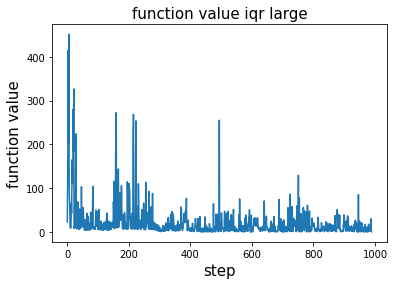

In [88]:
#f_noise_large= f.f_opt(w_store.T)[10:]
f_noise_large.shape
print(f_noise_large.var())
print(f_noise_large.mean())
plt.plot(f_noise_large)
plt.title("function value iqr large",fontsize=15)
plt.ylabel("function value",fontsize=15)
plt.xlabel("step",fontsize=15)

In [89]:
#対数正規分布
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []

for i in range(10):
    var = 1
    noise_data = noise.LogNormal(mean=0,sigma=var,dim=2,n=_t_max).generate() * 50
    iqr = helper.iqr(noise_data)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        noise_value = noise_data[algo.t-1]
        f = model_opt.RosenBrock(noise_value=noise_value)
        algo.update(model=f)
    last_w_store.append(algo.w)
    iqr_store.append(iqr)

print(iqr_store)
print(last_w_store)

/Users/naoki/ML/GD/model_opt.py:379: RuntimeWarning: overflow encountered in double_scalars
  tmp[i] = 100 * (-4) * w[i] * (w[i + 1] - w[i] ** 2) + 2 * (w[i] - 1)
/Users/naoki/ML/GD/algos.py:36: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - self.a * newdir
/Users/naoki/ML/GD/model_opt.py:381: RuntimeWarning: overflow encountered in double_scalars
  tmp[i] = 100 * 2 * (w[i] - w[i - 1] ** 2)
/Users/naoki/ML/GD/model_opt.py:379: RuntimeWarning: invalid value encountered in double_scalars
  tmp[i] = 100 * (-4) * w[i] * (w[i + 1] - w[i] ** 2) + 2 * (w[i] - 1)
/Users/naoki/ML/GD/model_opt.py:381: RuntimeWarning: invalid value encountered in double_scalars
  tmp[i] = 100 * 2 * (w[i] - w[i - 1] ** 2)


[72.77798525300432, 76.74761622470604, 72.96345762735638, 71.16692243225407, 75.9062336584717, 72.00844573019327, 70.67189175567127, 72.28609099887315, 71.39034320892793, 74.98270749770455]
[array([0.24612487, 0.01335384]), array([-0.29634193,  0.21556296]), array([-0.73142763,  0.54077317]), array([nan, nan]), array([ 0.21761678, -0.23396763]), array([nan, nan]), array([-0.44892822,  0.32267562]), array([0.39716403, 0.22715378]), array([-0.00152087, -0.00898643]), array([1.32008814, 1.73611463])]


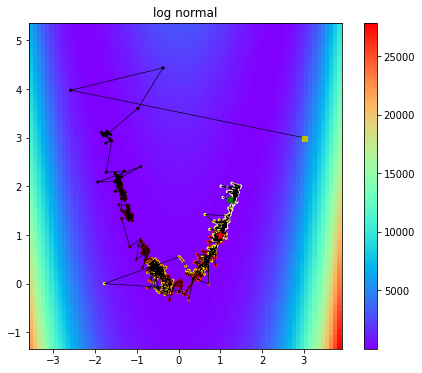

In [90]:
#lognormal
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("log normal")

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

1197.4604844566197
5.54114578468959


Text(0.5, 0, 'step')

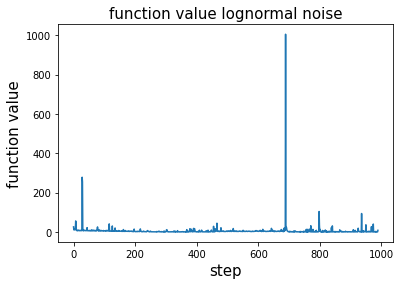

In [100]:
f_noise_lognormal = f.f_opt(w_store.T)[10:]
f_noise_lognormal.shape
print(f_noise_lognormal.var())
print(f_noise_lognormal.mean())
plt.plot(f_noise_lognormal)
plt.title("function value lognormal noise",fontsize=15)
plt.ylabel("function value",fontsize=15)
plt.xlabel("step",fontsize=15)

In [95]:
#student-t
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []

for i in range(10):
    df = 2
    noise_data = noise.StudentT(dim=2,n=_t_max,df=df).generate() * 45
    iqr = helper.iqr(noise_data)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        noise_value = noise_data[algo.t-1]
        f = model_opt.RosenBrock(noise_value=noise_value)
        algo.update(model=f)
    last_w_store.append(algo.w)
    iqr_store.append(iqr)
print(iqr_store)
print(last_w_store)

[75.39117404030333, 74.28923420910576, 71.36828356534281, 76.5358478824961, 73.33380785987863, 72.54721923652444, 79.5212996829341, 73.08600135920429, 71.55986702128817, 69.23997067486357]
[array([ 0.04323595, -0.10436918]), array([-0.10704763,  0.00125785]), array([1.36073986, 1.77752264]), array([-0.20109853, -0.0293513 ]), array([1.50301999, 2.31395722]), array([0.52915027, 0.37703569]), array([0.60008513, 0.29442114]), array([-1.4536917 ,  1.84891203]), array([-0.81224053,  0.81983553]), array([0.44542374, 0.3160744 ])]


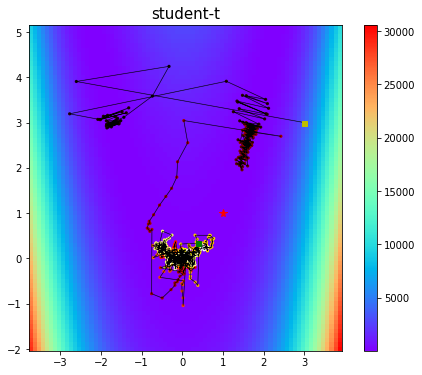

In [98]:
#student-t
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("student-t",fontsize=15)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

7876.847929532986
14.92216349091495


Text(0.5, 0, 'step')

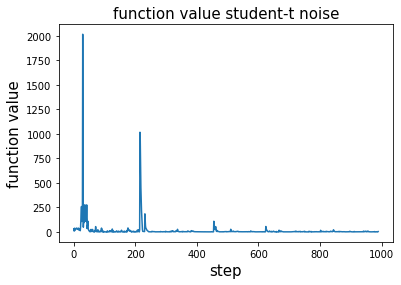

In [102]:
f_noise_student_t = f.f_opt(w_store.T)[10:]
f_noise_student_t.shape
print(f_noise_student_t.var())
print(f_noise_student_t.mean())
plt.plot(f_noise_student_t)
plt.title("function value student-t noise",fontsize=15)
plt.ylabel("function value",fontsize=15)
plt.xlabel("step",fontsize=15)

In [47]:
# パレート分布
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []

for i in range(2):
    a = 5
    noise_data = noise.Pareto(dim=2,n=_t_max,a=a).generate() * 300
    iqr = helper.iqr(noise_data)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        noise_value = noise_data[algo.t-1]
        f = model_opt.RosenBrock(noise_value=noise_value)
        algo.update(model=f)
    last_w_store.append(algo.w)
    iqr_store.append(iqr)

print(iqr_store)
print(last_w_store)

[80.74194407785838, 71.53696035536197]
[array([-0.09262968,  0.17927756]), array([-0.25375334,  0.14509861])]


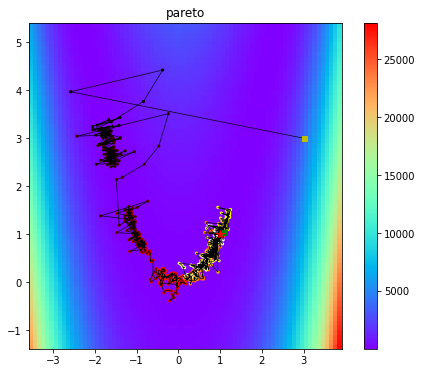

In [27]:
# パレート分布
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("pareto")

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [104]:
#混合正規分布
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []

for i in range(10):
    sigma = 10
    mean = 40
    noise_data = noise.GaussianMixture(dim=2,n=_t_max,sigma=sigma,mean=mean).generate()
    iqr = helper.iqr(noise_data)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        noise_value = noise_data[algo.t-1]
        f = model_opt.RosenBrock(noise_value=noise_value)
        algo.update(model=f)
    last_w_store.append(algo.w)
    iqr_store.append(iqr)


print(iqr_store)
print(last_w_store)

[[ 35.9326016   44.14639968]
 [-39.20005832 -33.18229915]
 [-44.60859869 -33.49568548]
 ...
 [ 40.4683376   35.97825889]
 [-27.15077541 -47.67781537]
 [ 48.93745168  45.27270883]]
[[-46.57727387 -43.86387966]
 [-54.21251555 -49.21107957]
 [-44.58122613 -46.04319121]
 ...
 [-25.42846589 -51.35268073]
 [-42.4385243  -42.02069337]
 [-31.92985825 -29.82165771]]
[[-40.86943873 -38.79779329]
 [-51.73249153 -36.36133895]
 [ 50.07147436  28.62083827]
 ...
 [-53.68523166 -44.91065392]
 [ 65.32668214  42.0024199 ]
 [ 37.25467997  47.97904139]]
[[-52.47807283 -24.95310991]
 [ 33.18050562  45.70440106]
 [-31.83539311 -45.20570204]
 ...
 [-20.06675394 -50.13074236]
 [ 38.40100449  38.89383085]
 [-47.1872743  -40.97478063]]
[[ 48.8525888   35.2666742 ]
 [ 29.77643527  48.49964237]
 [ 56.46131815  49.18491093]
 ...
 [ 28.94046515  40.92492547]
 [-35.6090516  -39.86706291]
 [-37.44555362 -41.87312387]]
[[ 53.44657335  42.24362124]
 [ 68.25083918  55.64426442]
 [ 34.03544362  41.3207198 ]
 ...
 [-34.89

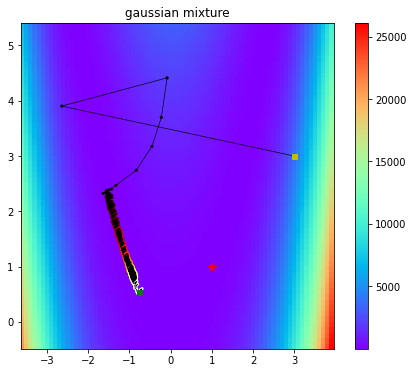

In [105]:
# 混合正規分布
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("gaussian mixture")

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()



1.7046874777817027
5.561463583514692


Text(0.5, 0, 'step')

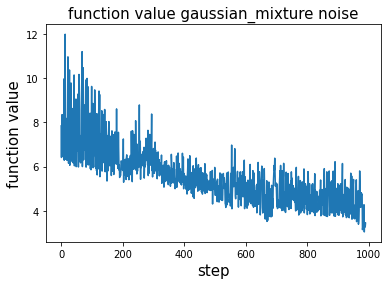

In [107]:
f_noise_gaussian_mixture = f.f_opt(w_store.T)[10:]
f_noise_gaussian_mixture .shape
print(f_noise_gaussian_mixture .var())
print(f_noise_gaussian_mixture .mean())
plt.plot(f_noise_gaussian_mixture)
plt.title("function value gaussian_mixture noise",fontsize=15)
plt.ylabel("function value",fontsize=15)
plt.xlabel("step",fontsize=15)

In [20]:
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []


df = 1
noise_data = noise.StudentT(dim=2,n=_t_max,df=df).generate() * 3
iqr = helper.iqr(noise_data)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
for i in algo:
    noise_value = noise_data[algo.t-1]
    f = model_opt.RosenBrock(noise_value=noise_value)
    algo.update(model=f)
last_w_store.append(algo.w)
iqr_store.append(iqr)

print(iqr_store)
print(last_w_store)

[5.91073929898263]
[array([nan, nan])]


In [21]:
# 混合正規分布
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("gaussian mixture")

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

ValueError: arange: cannot compute length